In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Training Data

In [2]:
data = pd.read_csv("fraudTrain.csv")

In [3]:
data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0


## Checking Null values

In [4]:
(data.isnull()).sum()

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         1
firstName      1
lastName       1
trans_num      1
is_fraud       1
dtype: int64

## Droping Null Values

In [5]:
data.dropna(inplace=True)

In [6]:
(data.isnull()).sum()

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64

## check duplicates

In [7]:
(data.duplicated()).sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ID           1002103 non-null  int64  
 1   Time         1002103 non-null  object 
 2   Card Number  1002103 non-null  float64
 3   merchant     1002103 non-null  object 
 4   category     1002103 non-null  object 
 5   Amount       1002103 non-null  float64
 6   firstName    1002103 non-null  object 
 7   lastName     1002103 non-null  object 
 8   trans_num    1002103 non-null  object 
 9   is_fraud     1002103 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 84.1+ MB


## Changing The Time to Time in Seconds "int instead of object"

In [9]:
data['Time'] = pd.to_datetime(data['Time'])
data['Time_Seconds'] = (data['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1002103 entries, 0 to 1002102
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   ID            1002103 non-null  int64         
 1   Time          1002103 non-null  datetime64[ns]
 2   Card Number   1002103 non-null  float64       
 3   merchant      1002103 non-null  object        
 4   category      1002103 non-null  object        
 5   Amount        1002103 non-null  float64       
 6   firstName     1002103 non-null  object        
 7   lastName      1002103 non-null  object        
 8   trans_num     1002103 non-null  object        
 9   is_fraud      1002103 non-null  float64       
 10  Time_Seconds  1002103 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 91.7+ MB


In [10]:
data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Time_Seconds
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1546300800
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1546300800
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1546300800
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1546300860
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1546300980


In [11]:
for col in data.select_dtypes(include='object').columns:
    print(f'column: {col}, unique: {len(data[col].unique())})')

column: merchant, unique: 693)
column: category, unique: 14)
column: firstName, unique: 347)
column: lastName, unique: 478)
column: trans_num, unique: 1002103)


In [12]:
unique_categories = data['category'].unique()
print(f'Unique categories: {len(unique_categories)}')
print(unique_categories)


Unique categories: 14
['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']


In [13]:
data['time_diff_prev'] = data.groupby('Card Number')['Time'].diff().dt.total_seconds().fillna(0)

data['amount_diff_card'] = data['Amount'] - data.groupby('Card Number')['Amount'].transform('mean')

data['amount_diff_cat'] = data['Amount'] - data.groupby('category')['Amount'].transform('mean')

data['amount_diff_mer'] = data['Amount'] - data.groupby('merchant')['Amount'].transform('mean')

data['transactions_last_hour'] = data.groupby('Card Number')['Time'].transform(lambda x: x.diff().lt(pd.Timedelta(hours=1)).cumsum())

## Encoding Catgory column

In [14]:
data = pd.get_dummies(data = data, columns=['category'],prefix='category',drop_first=False)
data.head()

,ID,Time,Card Number,merchant,Amount,firstName,lastName,trans_num,is_fraud,Time_Seconds,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0.0,1546300800,...,False,False,False,False,True,False,False,False,False,False
1,1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0.0,1546300800,...,True,False,False,False,False,False,False,False,False,False
2,2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0.0,1546300800,...,False,False,False,False,False,False,False,False,False,False
3,3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0.0,1546300860,...,False,False,False,False,False,False,False,False,False,False
4,4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0.0,1546300980,...,False,False,False,False,False,True,False,False,False,False


In [15]:
data.columns

Index(['ID', 'Time', 'Card Number', 'merchant', 'Amount', 'firstName',
       'lastName', 'trans_num', 'is_fraud', 'Time_Seconds', 'time_diff_prev',
       'amount_diff_card', 'amount_diff_cat', 'amount_diff_mer',
       'transactions_last_hour', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel'],
      dtype='object')

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label = preprocessing.LabelEncoder()
scaler = StandardScaler()
data['fullName']= data['firstName']  + data['lastName']
data['fullName']= label.fit_transform(data['fullName'])
data['fullName']= scaler.fit_transform(data[['fullName']])

In [17]:
data = data.drop(['ID', 'Time', 'merchant', 'firstName', 'lastName', 'trans_num'], axis=1)
data.head()

,Card Number,Amount,is_fraud,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,category_entertainment,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,fullName
0,2.700000e+15,4.97,0.0,1546300800,0.0,-80.460418,-75.871044,-77.641275,0,False,...,False,False,False,True,False,False,False,False,False,-0.284152
1,6.300000e+11,107.23,0.0,1546300800,0.0,41.070071,-9.670320,-8.622277,0,False,...,False,False,False,False,False,False,False,False,False,1.332826
2,3.890000e+13,220.11,0.0,1546300800,0.0,162.794069,155.981792,155.381124,0,True,...,False,False,False,False,False,False,False,False,False,-0.708517
3,3.530000e+15,45.00,0.0,1546300860,0.0,-22.173245,-18.431443,-17.990814,0,False,...,False,False,False,False,False,False,False,False,False,-0.214644
4,3.760000e+14,41.96,0.0,1546300980,0.0,-30.888363,-20.537300,-18.855316,0,False,...,False,False,False,False,True,False,False,False,False,1.566959


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Time_Seconds']=scaler.fit_transform(data[['Time_Seconds']])
data['Card Number']=scaler.fit_transform(data[['Card Number']])
data['Amount']=scaler.fit_transform(data[['Amount']])
data['time_diff_prev']=scaler.fit_transform(data[['time_diff_prev']])
data['amount_diff_card']=scaler.fit_transform(data[['amount_diff_card']])
data['amount_diff_cat']=scaler.fit_transform(data[['amount_diff_cat']])
data['amount_diff_mer']=scaler.fit_transform(data[['amount_diff_mer']])
data['transactions_last_hour']=scaler.fit_transform(data[['transactions_last_hour']])


In [19]:
data.describe()

,Card Number,Amount,is_fraud,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
count,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06
mean,1.073079e-16,-1.791206e-16,5.701011e-03,1.128311e-14,1.735758e-17,1.347198e-19,9.246033e-18,1.630819e-19,-3.153862e-17,8.310085e-17
std,1.000000e+00,1.000000e+00,7.528954e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.187080e-01,-4.323004e-01,0.000000e+00,-1.921442e+00,-3.892706e+00,-4.365272e+00,-6.965514e-01,-1.123329e+00,-5.824311e-01,-1.780405e+00
25%,-3.185706e-01,-3.783690e-01,0.000000e+00,-8.138232e-01,-4.098720e-01,-3.506943e-01,-3.162088e-01,-3.167247e-01,-5.584026e-01,-8.292416e-01
50%,-3.160187e-01,-1.425444e-01,0.000000e+00,6.336001e-03,-3.206304e-01,-1.463330e-01,-1.070767e-01,-1.071564e-01,-4.621635e-01,2.680551e-02
75%,-3.151630e-01,7.979738e-02,0.000000e+00,9.321207e-01,-2.637432e-02,7.891823e-02,9.371444e-02,9.407962e-02,1.240316e-01,8.462694e-01
max,3.493829e+00,1.802619e+02,1.000000e+00,1.732675e+00,3.805567e+01,1.805476e+02,1.815129e+02,1.816002e+02,5.424441e+00,1.705975e+00


## Data Representation

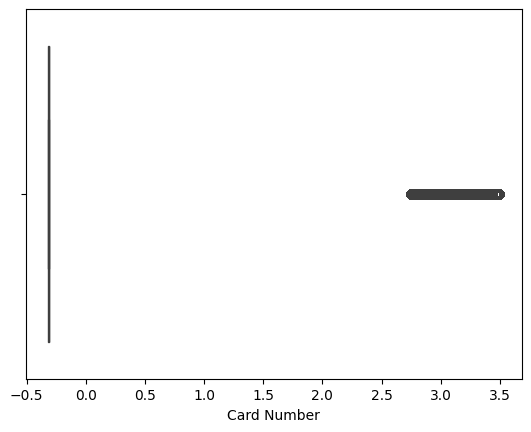

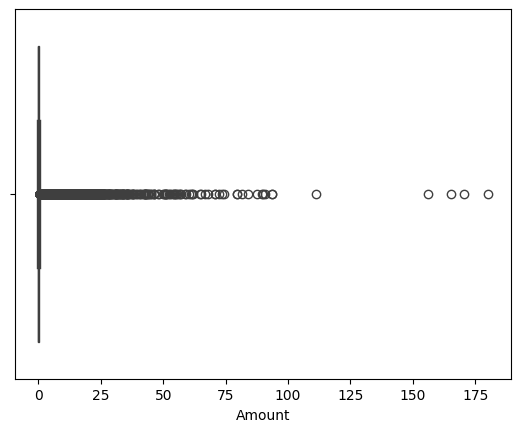

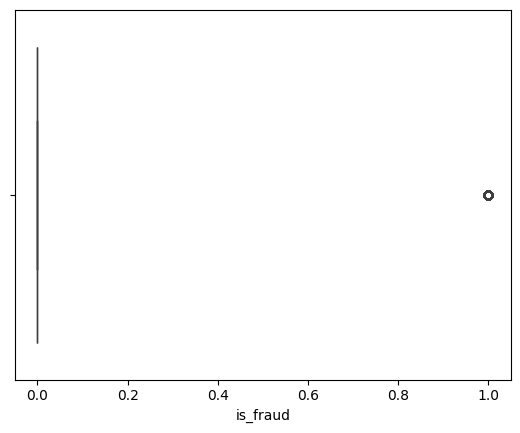

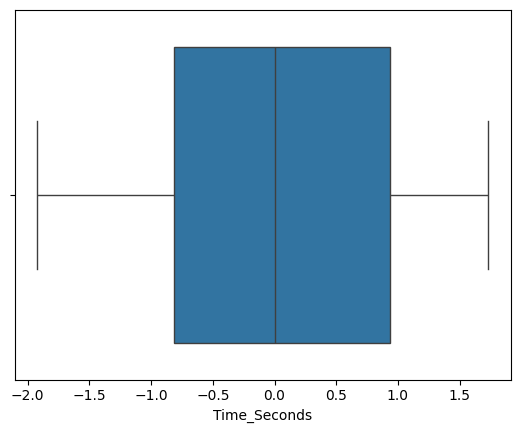

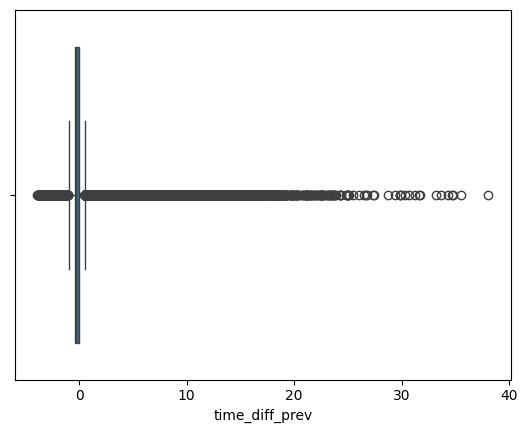

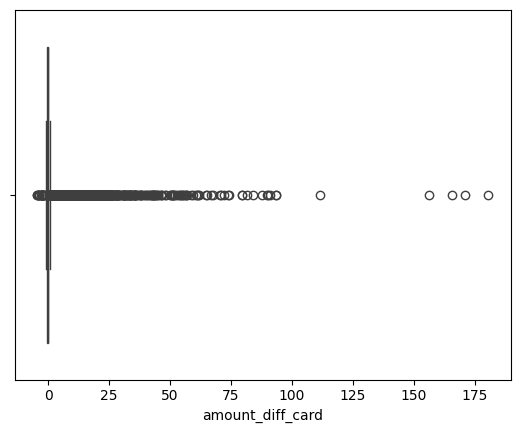

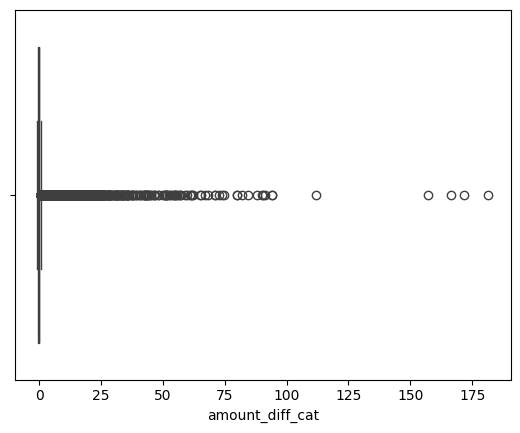

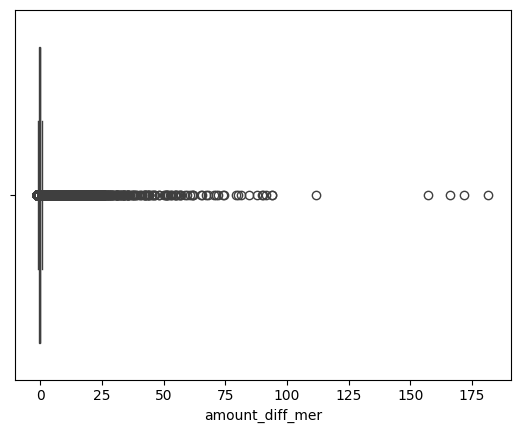

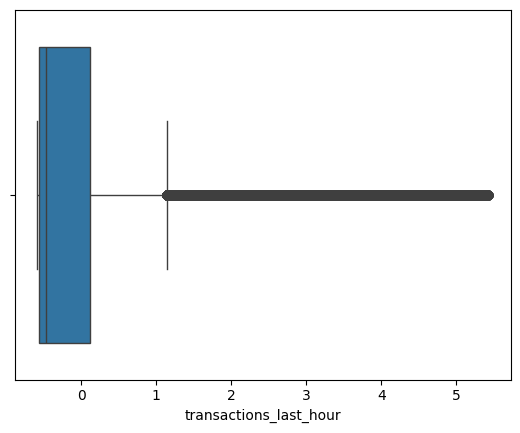

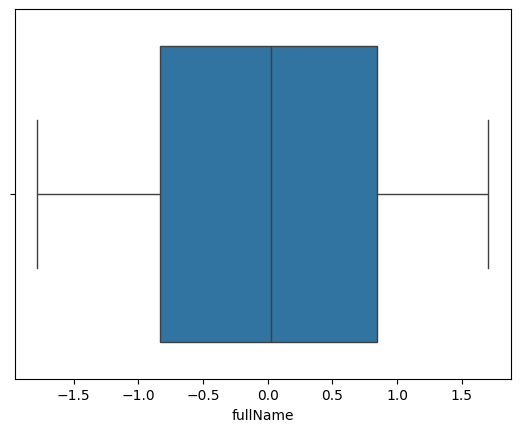

In [20]:
for col in data.select_dtypes(include='number').columns:
    sns.boxplot(data=data, x=col)
    plt.show()

In [21]:
corrleation_matrix = data.select_dtypes(include='number').corr()
corrleation_matrix

,Card Number,Amount,is_fraud,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
Card Number,1.000000e+00,0.000386,-0.003599,0.000547,0.137009,1.122213e-18,0.000120,0.000137,-0.174318,-0.024336
Amount,3.861757e-04,1.000000,0.217171,-0.001895,-0.003830,9.981449e-01,0.991684,0.991276,0.002810,-0.004397
is_fraud,-3.599213e-03,0.217171,1.000000,-0.011241,-0.010764,2.139857e-01,0.211981,0.212059,-0.003035,-0.004259
Time_Seconds,5.465219e-04,-0.001895,-0.011241,1.000000,-0.040502,-1.944554e-03,-0.001741,-0.001689,0.344561,0.001157
time_diff_prev,1.370088e-01,-0.003830,-0.010764,-0.040502,1.000000,-4.397174e-03,-0.005259,-0.005260,-0.216217,-0.007995
amount_diff_card,1.122213e-18,0.998145,0.213986,-0.001945,-0.004397,1.000000e+00,0.989876,0.989471,-0.000345,-0.002023
amount_diff_cat,1.202171e-04,0.991684,0.211981,-0.001741,-0.005259,9.898759e-01,1.000000,0.999327,0.002475,-0.004209
amount_diff_mer,1.368009e-04,0.991276,0.212059,-0.001689,-0.005260,9.894714e-01,0.999327,1.000000,0.002507,-0.004137
transactions_last_hour,-1.743184e-01,0.002810,-0.003035,0.344561,-0.216217,-3.449293e-04,0.002475,0.002507,1.000000,-0.009136
fullName,-2.433612e-02,-0.004397,-0.004259,0.001157,-0.007995,-2.023152e-03,-0.004209,-0.004137,-0.009136,1.000000


In [22]:
corrleation_matrix.columns

Index(['Card Number', 'Amount', 'is_fraud', 'Time_Seconds', 'time_diff_prev',
       'amount_diff_card', 'amount_diff_cat', 'amount_diff_mer',
       'transactions_last_hour', 'fullName'],
      dtype='object')

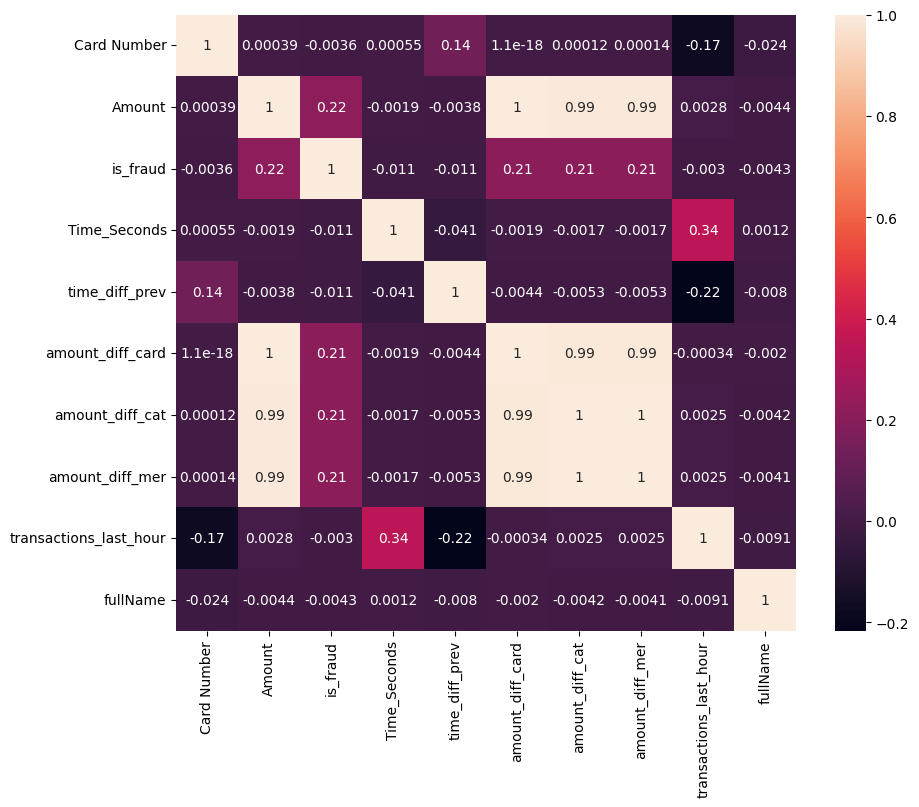

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=corrleation_matrix, annot=True)
plt.show()

In [24]:
data.head()

,Card Number,Amount,is_fraud,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,category_entertainment,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,fullName
0,-0.316645,-0.407519,0.0,-1.921442,-0.446051,-0.503171,-0.477562,-0.488906,-0.582431,False,...,False,False,False,True,False,False,False,False,False,-0.284152
1,-0.318708,0.230793,0.0,-1.921442,-0.446051,0.256838,-0.060869,-0.054294,-0.582431,False,...,False,False,False,False,False,False,False,False,False,1.332826
2,-0.318678,0.935395,0.0,-1.921442,-0.446051,1.018057,0.981811,0.978433,-0.582431,True,...,False,False,False,False,False,False,False,False,False,-0.708517
3,-0.316011,-0.157650,0.0,-1.921436,-0.446051,-0.138664,-0.116015,-0.113288,-0.582431,False,...,False,False,False,False,False,False,False,False,False,-0.214644
4,-0.318421,-0.176626,0.0,-1.921423,-0.446051,-0.193165,-0.129270,-0.118732,-0.582431,False,...,False,False,False,False,True,False,False,False,False,1.566959


## visualizing the ratio between the fraud and non fraud

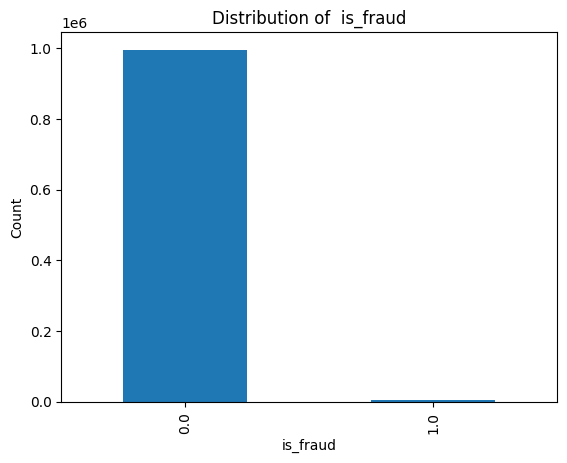

In [25]:
fraud_distribution = data['is_fraud'].value_counts()
fraud_distribution.plot(kind='bar')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.title('Distribution of  is_fraud')
plt.show()


In [26]:
X  = data.drop(['is_fraud'], axis= 1)
y = data['is_fraud']


In [27]:
X.head()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,category_entertainment,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,fullName
0,-0.316645,-0.407519,-1.921442,-0.446051,-0.503171,-0.477562,-0.488906,-0.582431,False,False,...,False,False,False,True,False,False,False,False,False,-0.284152
1,-0.318708,0.230793,-1.921442,-0.446051,0.256838,-0.060869,-0.054294,-0.582431,False,False,...,False,False,False,False,False,False,False,False,False,1.332826
2,-0.318678,0.935395,-1.921442,-0.446051,1.018057,0.981811,0.978433,-0.582431,True,False,...,False,False,False,False,False,False,False,False,False,-0.708517
3,-0.316011,-0.157650,-1.921436,-0.446051,-0.138664,-0.116015,-0.113288,-0.582431,False,False,...,False,False,False,False,False,False,False,False,False,-0.214644
4,-0.318421,-0.176626,-1.921423,-0.446051,-0.193165,-0.129270,-0.118732,-0.582431,False,False,...,False,False,False,False,True,False,False,False,False,1.566959


In [28]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_fraud, dtype: float64

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
def metrics_all(y_true, y_pred):
    print(accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['non-fraud', 'fraud'])
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size':12})
    disp.plot()
    plt.show()

## spliting the data into train and test

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
X_test.describe()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
count,250526.000000,250526.000000,250526.000000,250526.000000,250526.000000,250526.000000,250526.000000,250526.000000,250526.000000
mean,0.000495,-0.000345,-0.000320,-0.000653,-0.000316,-0.000635,-0.000618,0.002545,-0.000571
std,1.000807,0.949257,1.000149,0.996579,0.949299,0.948688,0.948632,1.004674,1.000196
min,-0.318708,-0.432300,-1.921442,-3.892706,-2.493737,-0.696551,-1.123014,-0.582431,-1.780405
25%,-0.318571,-0.378431,-0.816440,-0.409872,-0.351008,-0.317019,-0.317316,-0.558277,-0.836558
50%,-0.316019,-0.142232,0.005996,-0.320630,-0.145976,-0.107438,-0.107620,-0.461413,0.026806
75%,-0.315163,0.080484,0.931966,-0.026374,0.079284,0.093808,0.094288,0.124501,0.853586
max,3.493829,90.886886,1.732662,34.787496,91.081423,91.388414,91.365143,5.423941,1.705975


In [32]:
print(y_train[y_train > 0].count())
print(y_train[y_train < 1].count())

4328
747249


In [33]:
print(y_test[y_test > 0].count())
print(y_test[y_test < 1].count())

1385
249141


## **Training the Model with Different Weights**

## Logistic Regression Model Training

In [34]:
from sklearn.linear_model import LogisticRegression

LogisticRegressio_model = LogisticRegression(n_jobs=-1, class_weight={1: 100})

In [35]:
LogisticRegressio_model.fit(X_train,y_train)

LogisticRegression(class_weight={1: 100}, n_jobs=-1)

In [36]:
Logistic_prediction = LogisticRegressio_model.predict(X_test)

0.96617516744769
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    249141
         1.0       0.11      0.74      0.19      1385

    accuracy                           0.97    250526
   macro avg       0.56      0.85      0.59    250526
weighted avg       0.99      0.97      0.98    250526



<Figure size 1500x1000 with 0 Axes>

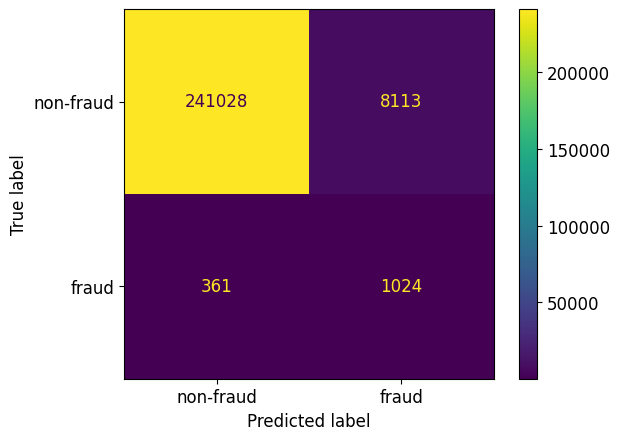

In [37]:
metrics_all(y_test,Logistic_prediction)

## RandomForest Model Training

In [38]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_model = RandomForestClassifier(n_jobs=-1, class_weight={1:100})

In [39]:
RandomForest_model.fit(X_train, y_train)

RandomForestClassifier(class_weight={1: 100}, n_jobs=-1)

In [40]:
RandomForest_prediction = RandomForest_model.predict(X_test)

0.9972777276610012
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249141
         1.0       0.83      0.64      0.72      1385

    accuracy                           1.00    250526
   macro avg       0.91      0.82      0.86    250526
weighted avg       1.00      1.00      1.00    250526



<Figure size 1500x1000 with 0 Axes>

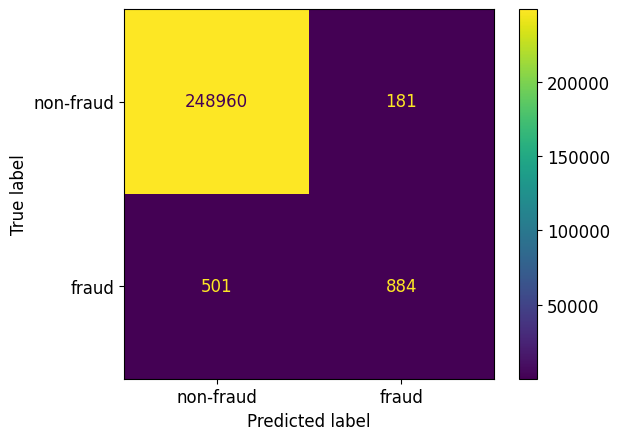

In [41]:
metrics_all(y_test,RandomForest_prediction)

## Desicion Tree Model Training

In [42]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_model = DecisionTreeClassifier(class_weight={1:100})

In [43]:
DecisionTree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={1: 100})

In [44]:
DecisionTree_prediction = DecisionTree_model.predict(X_test)

0.9960682723549652
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249141
         1.0       0.65      0.63      0.64      1385

    accuracy                           1.00    250526
   macro avg       0.82      0.81      0.82    250526
weighted avg       1.00      1.00      1.00    250526



<Figure size 1500x1000 with 0 Axes>

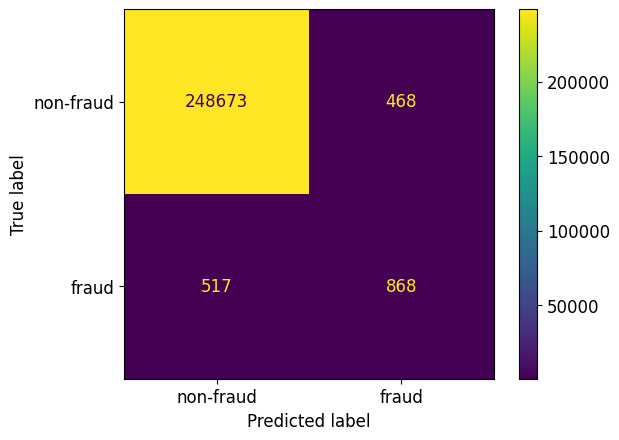

In [45]:
metrics_all(y_test,DecisionTree_prediction)

## BalancedBaggingClassifier

In [46]:
from imblearn.ensemble import BalancedBaggingClassifier

BalancedBagging_model = BalancedBaggingClassifier(estimator =DecisionTreeClassifier(class_weight={1:100}), sampling_strategy='not majority', 
replacement= False,         
random_state=42,
n_jobs= -1)

In [47]:
BalancedBagging_model.fit(X_train, y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(class_weight={1: 100}),
                          n_jobs=-1, random_state=42,
                          sampling_strategy='not majority')

In [48]:
BalancedBagging_prediction = BalancedBagging_model.predict(X_test)

0.9971380216025483
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249141
         1.0       0.83      0.60      0.70      1385

    accuracy                           1.00    250526
   macro avg       0.92      0.80      0.85    250526
weighted avg       1.00      1.00      1.00    250526



<Figure size 1500x1000 with 0 Axes>

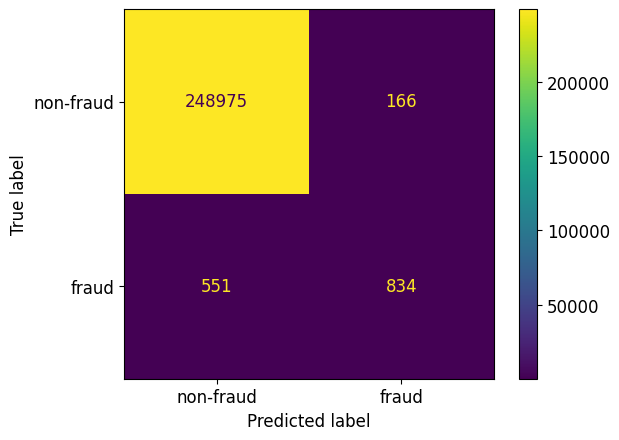

In [49]:
metrics_all(y_test,BalancedBagging_prediction)

## XGV classification model

In [50]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(n_jobs=-1)

In [51]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
XGB_prediction = XGB_model.predict(X_test)

0.9979203755298851
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249141
         1.0       0.91      0.69      0.79      1385

    accuracy                           1.00    250526
   macro avg       0.95      0.85      0.89    250526
weighted avg       1.00      1.00      1.00    250526



<Figure size 1500x1000 with 0 Axes>

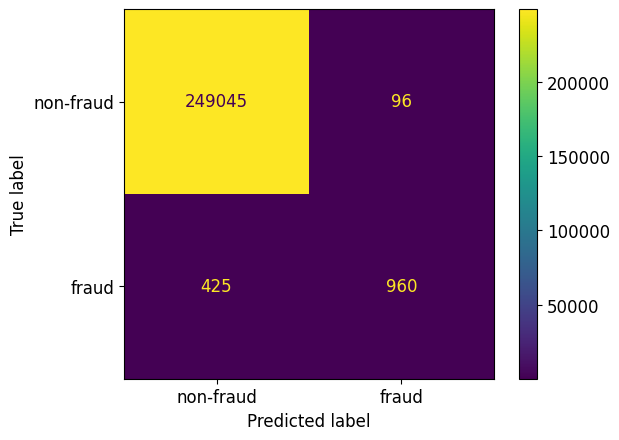

In [53]:
metrics_all(y_test,XGB_prediction)

## **Random Over Sampling**

In [54]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [55]:
x_ros, y_ros = ros.fit_resample(X, y)

In [56]:
X.describe()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
count,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06,1.002103e+06
mean,1.073079e-16,-1.791206e-16,1.128311e-14,1.735758e-17,1.347198e-19,9.246033e-18,1.630819e-19,-3.153862e-17,8.310085e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.187080e-01,-4.323004e-01,-1.921442e+00,-3.892706e+00,-4.365272e+00,-6.965514e-01,-1.123329e+00,-5.824311e-01,-1.780405e+00
25%,-3.185706e-01,-3.783690e-01,-8.138232e-01,-4.098720e-01,-3.506943e-01,-3.162088e-01,-3.167247e-01,-5.584026e-01,-8.292416e-01
50%,-3.160187e-01,-1.425444e-01,6.336001e-03,-3.206304e-01,-1.463330e-01,-1.070767e-01,-1.071564e-01,-4.621635e-01,2.680551e-02
75%,-3.151630e-01,7.979738e-02,9.321207e-01,-2.637432e-02,7.891823e-02,9.371444e-02,9.407962e-02,1.240316e-01,8.462694e-01
max,3.493829e+00,1.802619e+02,1.732675e+00,3.805567e+01,1.805476e+02,1.815129e+02,1.816002e+02,5.424441e+00,1.705975e+00


In [57]:
x_ros.describe()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
count,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06,1.992780e+06
mean,-2.334012e-02,1.425392e+00,-7.350492e-02,-7.047754e-02,1.404412e+00,1.391200e+00,1.391721e+00,-1.971338e-02,-2.779142e-02
std,9.642189e-01,2.351343e+00,1.043572e+00,8.836061e-01,2.348971e+00,2.331564e+00,2.332604e+00,1.006879e+00,1.000848e+00
min,-3.187080e-01,-4.323004e-01,-1.921442e+00,-3.892706e+00,-4.365272e+00,-6.965514e-01,-1.123329e+00,-5.824311e-01,-1.780405e+00
25%,-3.185706e-01,-3.127651e-01,-9.851858e-01,-4.171078e-01,-3.047506e-01,-2.397949e-01,-2.401297e-01,-5.650354e-01,-8.767998e-01
50%,-3.160187e-01,1.126930e-01,-5.587769e-02,-3.543975e-01,1.070146e-01,1.197732e-01,1.197853e-01,-4.760549e-01,-2.441098e-02
75%,-3.151630e-01,2.510467e+00,8.731941e-01,-1.373233e-01,2.331702e+00,2.525385e+00,2.531910e+00,6.045622e-02,8.279778e-01
max,3.493829e+00,1.802619e+02,1.732675e+00,3.805567e+01,1.805476e+02,1.815129e+02,1.816002e+02,5.424441e+00,1.705975e+00


In [58]:
from collections import Counter
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0.0: 996390, 1.0: 5713})
Resample dataset shape Counter({0.0: 996390, 1.0: 996390})


C:\Users\Abdelsatter\AppData\Local\Temp\ipykernel_20108\1025783371.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_ros).plot.bar()
C:\Users\Abdelsatter\AppData\Local\Temp\ipykernel_20108\1025783371.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_ros)


is_fraud
0.0    996390
1.0    996390
Name: count, dtype: int64

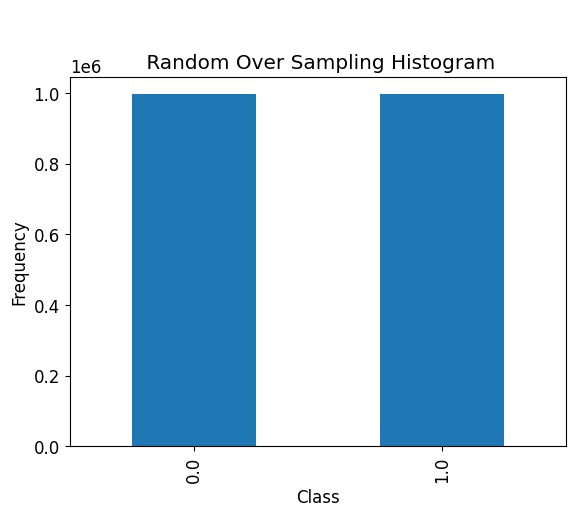

In [59]:
pd.value_counts(y_ros).plot.bar()
plt.title('\n\n Random Over Sampling Histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_ros)



In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25, random_state=42)

In [61]:
print(y_train[y_train > 0].count())
print(y_train[y_train < 1].count())
print(y_test[y_test > 0].count())
print(y_test[y_test < 1].count())

747429
747156
248961
249234


## ROS LOGISTIC

In [62]:
from sklearn.linear_model import LogisticRegression

LogisticRegressio_rosmodel = LogisticRegression(n_jobs=-1)

In [63]:
LogisticRegressio_rosmodel.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [64]:
Logistic_rosprediction = LogisticRegressio_model.predict(X_test)

0.8516946175694257
              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87    249234
         1.0       0.96      0.74      0.83    248961

    accuracy                           0.85    498195
   macro avg       0.87      0.85      0.85    498195
weighted avg       0.87      0.85      0.85    498195



<Figure size 1500x1000 with 0 Axes>

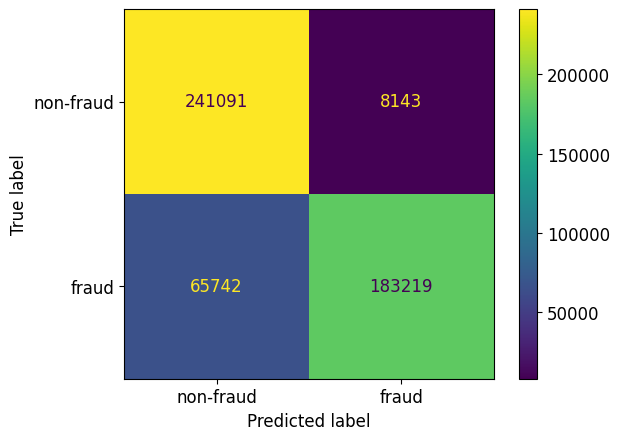

In [65]:

metrics_all(y_test,Logistic_rosprediction)

## ROS RANDOMFOREST

In [66]:
from sklearn.ensemble import RandomForestClassifier

RandomForest_rosmodel = RandomForestClassifier(n_jobs=-1)

In [67]:
RandomForest_rosmodel.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [68]:
RandomForest_rosprediction = RandomForest_rosmodel.predict(X_test)

0.9993295797830167
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249234
         1.0       1.00      1.00      1.00    248961

    accuracy                           1.00    498195
   macro avg       1.00      1.00      1.00    498195
weighted avg       1.00      1.00      1.00    498195



<Figure size 1500x1000 with 0 Axes>

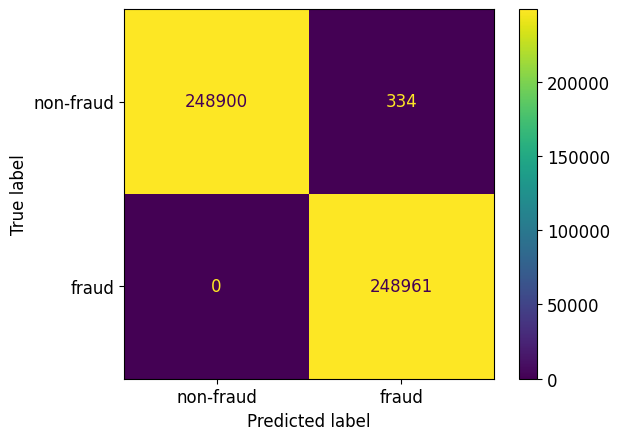

In [69]:
metrics_all(y_test,RandomForest_rosprediction)

## ROS DT

In [70]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree_rosmodel = DecisionTreeClassifier()

In [71]:
DecisionTree_rosmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
DecisionTree_rosprediction = DecisionTree_rosmodel.predict(X_test)

0.9988498479511034
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249234
         1.0       1.00      1.00      1.00    248961

    accuracy                           1.00    498195
   macro avg       1.00      1.00      1.00    498195
weighted avg       1.00      1.00      1.00    498195



<Figure size 1500x1000 with 0 Axes>

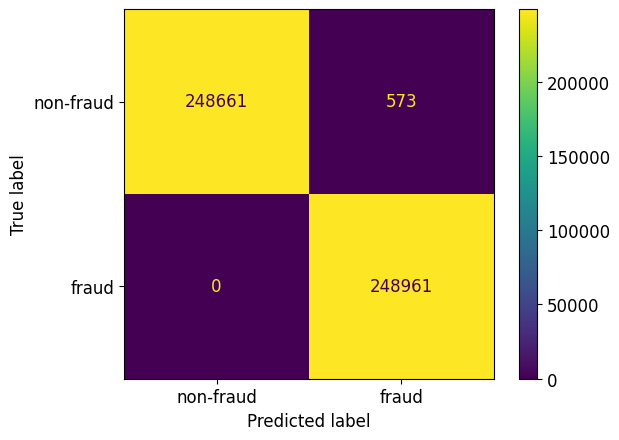

In [73]:
metrics_all(y_test,DecisionTree_rosprediction)

## ROS BALANCEDBAGGING

In [74]:
from imblearn.ensemble import BalancedBaggingClassifier

BalancedBagging_rosmodel = BalancedBaggingClassifier(estimator =DecisionTreeClassifier(class_weight={1:100}), sampling_strategy='not majority', 
replacement= False,         
random_state=42,
n_jobs= -1)

BalancedBagging_rosmodel.fit(X_train, y_train)

BalancedBagging_rosprediction = BalancedBagging_rosmodel.predict(X_test)

0.9991770290749606
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    249234
         1.0       1.00      1.00      1.00    248961

    accuracy                           1.00    498195
   macro avg       1.00      1.00      1.00    498195
weighted avg       1.00      1.00      1.00    498195



<Figure size 1500x1000 with 0 Axes>

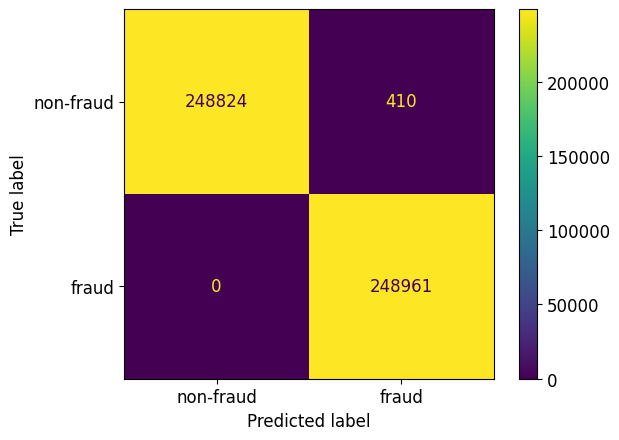

In [75]:
metrics_all(y_test,BalancedBagging_rosprediction)

## ROS XGBClassifier

In [76]:
from xgboost import XGBClassifier
XGB_rosmodel = XGBClassifier(n_jobs=-1)

XGB_rosmodel.fit(X_train, y_train)

XGB_rosprediction = XGB_rosmodel.predict(X_test)

0.993546703599996
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    249234
         1.0       0.99      1.00      0.99    248961

    accuracy                           0.99    498195
   macro avg       0.99      0.99      0.99    498195
weighted avg       0.99      0.99      0.99    498195



<Figure size 1500x1000 with 0 Axes>

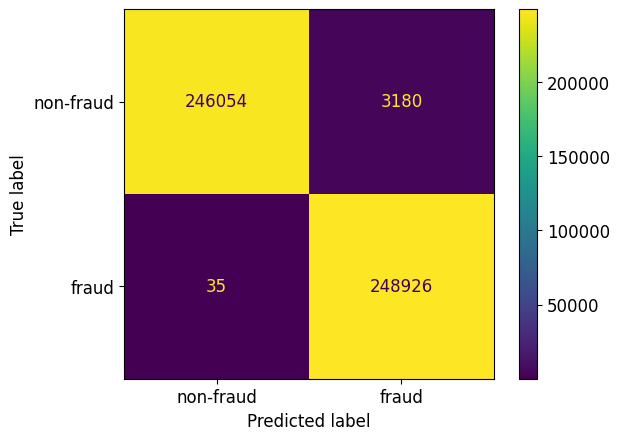

In [77]:
metrics_all(y_test,XGB_rosprediction)

## **SMOTE**

In [78]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [80]:
smote = SMOTE(random_state=42, k_neighbors= 5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [81]:
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_train_resampled))

Original dataset shape Counter({0.0: 996390, 1.0: 5713})
Resample dataset shape Counter({0.0: 747249, 1.0: 747249})


C:\Users\Abdelsatter\AppData\Local\Temp\ipykernel_20108\3870961729.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train_resampled).plot.bar()
C:\Users\Abdelsatter\AppData\Local\Temp\ipykernel_20108\3870961729.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y_train_resampled)


is_fraud
0.0    747249
1.0    747249
Name: count, dtype: int64

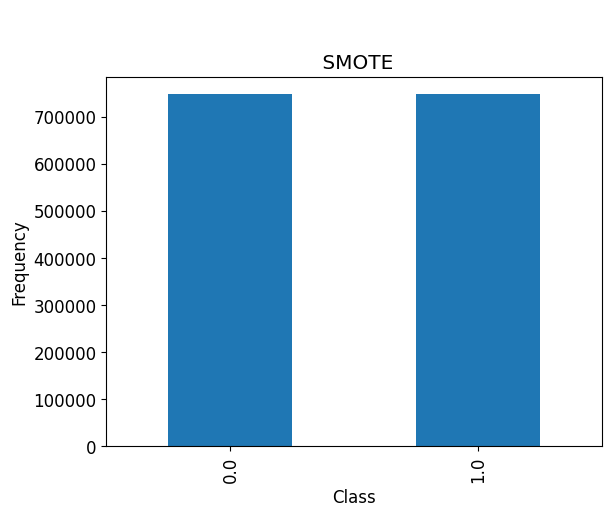

In [82]:
pd.value_counts(y_train_resampled).plot.bar()
plt.title('\n\n SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_train_resampled)

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.25, random_state=42)

In [84]:
smoterf_model = RandomForestClassifier(n_jobs=-1, random_state=42)

smoterf_model.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [85]:
smotey_prediction = smoterf_model.predict(X_test)

0.9976446972231515
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    186690
         1.0       1.00      1.00      1.00    186935

    accuracy                           1.00    373625
   macro avg       1.00      1.00      1.00    373625
weighted avg       1.00      1.00      1.00    373625



<Figure size 1500x1000 with 0 Axes>

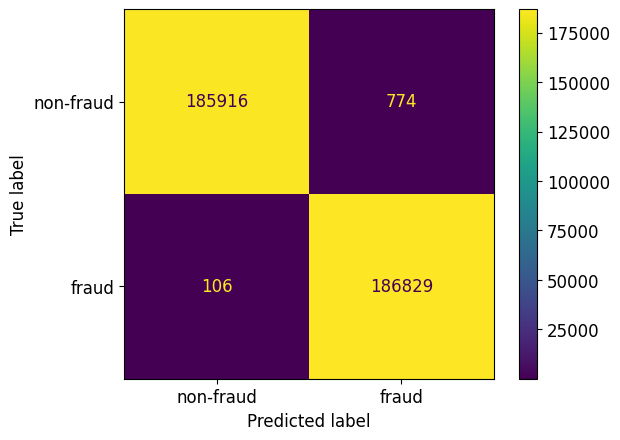

In [86]:
metrics_all(y_test,smotey_prediction)

## __**Testing the Model with Test Data**__

In [87]:
test_data = pd.read_excel('fraudTest.xlsx') 
test_data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


## Checking NULLS

In [88]:
(test_data.isnull()).sum()

ID             0
Time           0
Card Number    0
merchant       0
category       0
Amount         0
firstName      0
lastName       0
trans_num      0
is_fraud       0
dtype: int64

## checking Duplicated

In [89]:
(test_data.duplicated()).sum()

0

In [90]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           555719 non-null  int64         
 1   Time         555719 non-null  datetime64[ns]
 2   Card Number  555719 non-null  int64         
 3   merchant     555719 non-null  object        
 4   category     555719 non-null  object        
 5   Amount       555719 non-null  float64       
 6   firstName    555719 non-null  object        
 7   lastName     555719 non-null  object        
 8   trans_num    555719 non-null  object        
 9   is_fraud     555719 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 42.4+ MB


## Changing The Time to Time in Seconds "int instead of object"

In [91]:
test_data['Time'] = pd.to_datetime(test_data['Time'])
test_data['Time_Seconds'] = (test_data['Time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s') 
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   ID            555719 non-null  int64         
 1   Time          555719 non-null  datetime64[ns]
 2   Card Number   555719 non-null  int64         
 3   merchant      555719 non-null  object        
 4   category      555719 non-null  object        
 5   Amount        555719 non-null  float64       
 6   firstName     555719 non-null  object        
 7   lastName      555719 non-null  object        
 8   trans_num     555719 non-null  object        
 9   is_fraud      555719 non-null  int64         
 10  Time_Seconds  555719 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 46.6+ MB


In [92]:
test_data.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud,Time_Seconds
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,1592741665
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,1592741673
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,1592741693
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,1592741715
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,1592741717


In [93]:
for col in test_data.select_dtypes(include='object').columns:
    print(f'column: {col}, unique: {len(test_data[col].unique())})')

column: merchant, unique: 693)
column: category, unique: 14)
column: firstName, unique: 341)
column: lastName, unique: 471)
column: trans_num, unique: 555719)


In [94]:
test_data['time_diff_prev'] = test_data.groupby('Card Number')['Time'].diff().dt.total_seconds().fillna(0)

test_data['amount_diff_card'] = test_data['Amount'] - test_data.groupby('Card Number')['Amount'].transform('mean')

test_data['amount_diff_cat'] = test_data['Amount'] - test_data.groupby('category')['Amount'].transform('mean')

test_data['amount_diff_mer'] = test_data['Amount'] - test_data.groupby('merchant')['Amount'].transform('mean')

test_data['transactions_last_hour'] = test_data.groupby('Card Number')['Time'].transform(lambda x: x.diff().lt(pd.Timedelta(hours=1)).cumsum())

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_data['Time_Seconds']=scaler.fit_transform(test_data[['Time_Seconds']])
test_data['Card Number']=scaler.fit_transform(test_data[['Card Number']])
test_data['Amount']=scaler.fit_transform(test_data[['Amount']])
test_data['time_diff_prev']=scaler.fit_transform(test_data[['time_diff_prev']])
test_data['amount_diff_card']=scaler.fit_transform(test_data[['amount_diff_card']])
test_data['amount_diff_cat']=scaler.fit_transform(test_data[['amount_diff_cat']])
test_data['amount_diff_mer']=scaler.fit_transform(test_data[['amount_diff_mer']])
test_data['transactions_last_hour']=scaler.fit_transform(test_data[['transactions_last_hour']])

In [96]:
test_data = pd.get_dummies(data = test_data, columns=['category'],prefix='category',drop_first=False)
test_data.head()

,ID,Time,Card Number,merchant,Amount,firstName,lastName,trans_num,is_fraud,Time_Seconds,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,0,2020-06-21 12:14:25,-0.317252,fraud_Kirlin and Sons,-0.424463,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0,-1.703871,...,False,False,False,False,False,False,True,False,False,False
1,1,2020-06-21 12:14:33,-0.316273,fraud_Sporer-Keebler,-0.252337,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0,-1.703869,...,False,False,False,False,False,False,True,False,False,False
2,2,2020-06-21 12:14:53,-0.316254,"fraud_Swaniawski, Nitzsche and Welch",-0.179353,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0,-1.703865,...,False,True,False,False,False,False,False,False,False,False
3,3,2020-06-21 12:15:15,-0.316259,fraud_Haley Group,-0.059605,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0,-1.703861,...,False,False,False,False,False,True,False,False,False,False
4,4,2020-06-21 12:15:17,-0.316308,fraud_Johnston-Casper,-0.422358,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0,-1.703861,...,False,False,False,False,False,False,False,False,False,True


In [97]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label = preprocessing.LabelEncoder()
scaler = StandardScaler()
test_data['fullName']= test_data['firstName']  + test_data['lastName']
test_data['fullName']= label.fit_transform(test_data['fullName'])
test_data['fullName']= scaler.fit_transform(test_data[['fullName']])

In [98]:
test_data = test_data.drop(['ID', 'Time', 'merchant', 'firstName', 'lastName', 'trans_num'], axis=1)
test_data.head()

,Card Number,Amount,is_fraud,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,category_entertainment,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,fullName
0,-0.317252,-0.424463,0,-1.703871,-0.685169,-0.379307,-0.291858,-0.297932,-0.947219,False,...,False,False,False,False,False,True,False,False,False,-0.327833
1,-0.316273,-0.252337,0,-1.703869,-0.685169,-0.152644,-0.118311,-0.125646,-0.947219,False,...,False,False,False,False,False,True,False,False,False,-0.133723
2,-0.316254,-0.179353,0,-1.703865,-0.685169,-0.268411,-0.080968,-0.069109,-0.947219,False,...,True,False,False,False,False,False,False,False,False,-1.496303
3,-0.316259,-0.059605,0,-1.703861,-0.685169,0.005413,-0.013715,-0.030436,-0.947219,False,...,False,False,False,False,True,False,False,False,False,-1.347865
4,-0.316308,-0.422358,0,-1.703861,-0.685169,-0.334660,-0.702417,-0.704769,-0.947219,False,...,False,False,False,False,False,False,False,False,True,0.817800


In [99]:
X_testData  = test_data.drop(['is_fraud'], axis= 1)
y_testData = test_data['is_fraud']


In [100]:
X_testData.head()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,category_entertainment,category_food_dining,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,fullName
0,-0.317252,-0.424463,-1.703871,-0.685169,-0.379307,-0.291858,-0.297932,-0.947219,False,False,...,False,False,False,False,False,True,False,False,False,-0.327833
1,-0.316273,-0.252337,-1.703869,-0.685169,-0.152644,-0.118311,-0.125646,-0.947219,False,False,...,False,False,False,False,False,True,False,False,False,-0.133723
2,-0.316254,-0.179353,-1.703865,-0.685169,-0.268411,-0.080968,-0.069109,-0.947219,False,False,...,True,False,False,False,False,False,False,False,False,-1.496303
3,-0.316259,-0.059605,-1.703861,-0.685169,0.005413,-0.013715,-0.030436,-0.947219,False,False,...,False,False,False,False,True,False,False,False,False,-1.347865
4,-0.316308,-0.422358,-1.703861,-0.685169,-0.334660,-0.702417,-0.704769,-0.947219,False,False,...,False,False,False,False,False,False,False,False,True,0.817800


In [101]:
X_testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Card Number              555719 non-null  float64
 1   Amount                   555719 non-null  float64
 2   Time_Seconds             555719 non-null  float64
 3   time_diff_prev           555719 non-null  float64
 4   amount_diff_card         555719 non-null  float64
 5   amount_diff_cat          555719 non-null  float64
 6   amount_diff_mer          555719 non-null  float64
 7   transactions_last_hour   555719 non-null  float64
 8   category_entertainment   555719 non-null  bool   
 9   category_food_dining     555719 non-null  bool   
 10  category_gas_transport   555719 non-null  bool   
 11  category_grocery_net     555719 non-null  bool   
 12  category_grocery_pos     555719 non-null  bool   
 13  category_health_fitness  555719 non-null  bool   
 14  cate

In [102]:
X_testData.describe()

,Card Number,Amount,Time_Seconds,time_diff_prev,amount_diff_card,amount_diff_cat,amount_diff_mer,transactions_last_hour,fullName
count,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05,5.557190e+05
mean,7.840380e-17,3.375506e-18,1.904686e-14,1.657067e-17,-3.068642e-19,2.045761e-18,2.020189e-18,1.472948e-17,-9.845226e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.190009e-01,-4.363295e-01,-1.703871e+00,-6.851689e-01,-5.283909e+00,-7.165043e-01,-1.157771e+00,-9.472189e-01,-1.762729e+00
25%,-3.188635e-01,-3.812722e-01,-8.940874e-01,-5.588755e-01,-3.282540e-01,-3.202384e-01,-3.194887e-01,-7.219222e-01,-8.568796e-01
50%,-3.163125e-01,-1.410105e-01,1.598178e-02,-3.375978e-01,-1.493381e-01,-1.080350e-01,-1.078931e-01,-3.306174e-01,2.613320e-02
75%,-3.154620e-01,8.687435e-02,9.975043e-01,1.559733e-01,8.638102e-02,9.840518e-02,9.877689e-02,3.571303e-01,8.444425e-01
max,3.492429e+00,1.448123e+02,1.510355e+00,2.792952e+01,1.457377e+02,1.457309e+02,1.456208e+02,5.930259e+00,1.723649e+00


In [103]:
y_testData.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

## Testing using logistic regression

In [104]:
LogisticRegression_Testprediction = LogisticRegressio_model.predict(X_testData)

0.9601543225982916
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.07      0.75      0.13      2145

    accuracy                           0.96    555719
   macro avg       0.53      0.85      0.55    555719
weighted avg       1.00      0.96      0.98    555719



<Figure size 1500x1000 with 0 Axes>

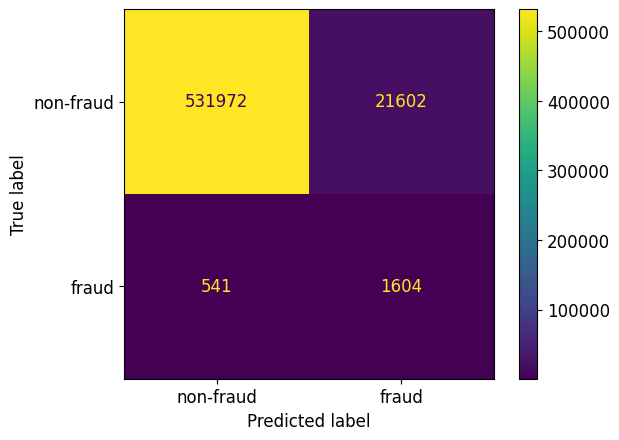

In [105]:
metrics_all(y_testData,LogisticRegression_Testprediction)

## Testing RadnomForestModel

In [106]:

RandomForest_Testprediction = RandomForest_model.predict(X_testData)

0.9978442342262906
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.62      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.81      0.84    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

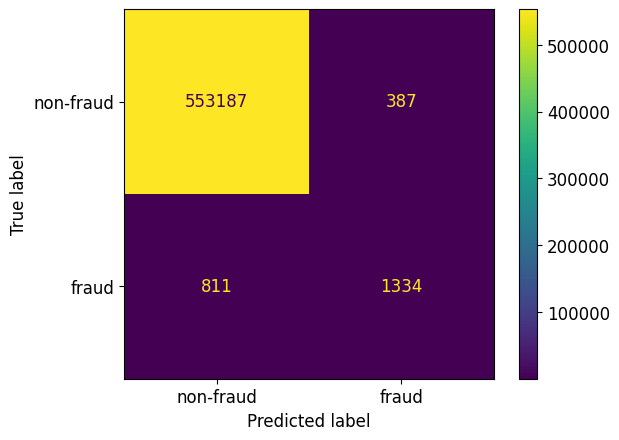

In [107]:
metrics_all(y_testData,RandomForest_Testprediction)

## Testing DecisionTree Model

In [108]:
DecisionTree_Testprediction = DecisionTree_model.predict(X_testData)

0.9966799767508399
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.57      0.59      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.79      0.79    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

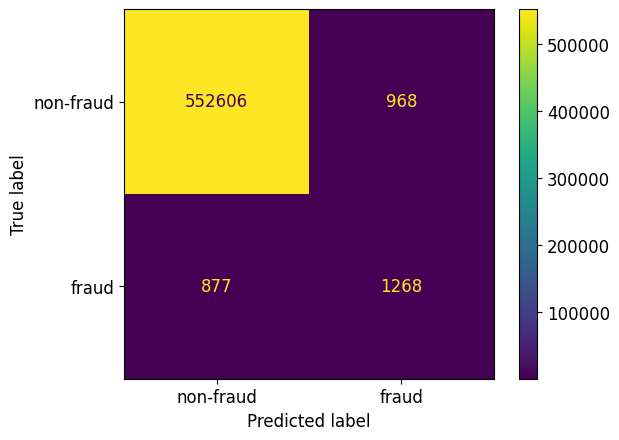

In [109]:
metrics_all(y_testData,DecisionTree_Testprediction)

## Testing BalancedBagging

In [110]:
BalancedBagging_Testprediction = BalancedBagging_model.predict(X_testData)

0.9977002765786306
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.56      0.65      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.78      0.83    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

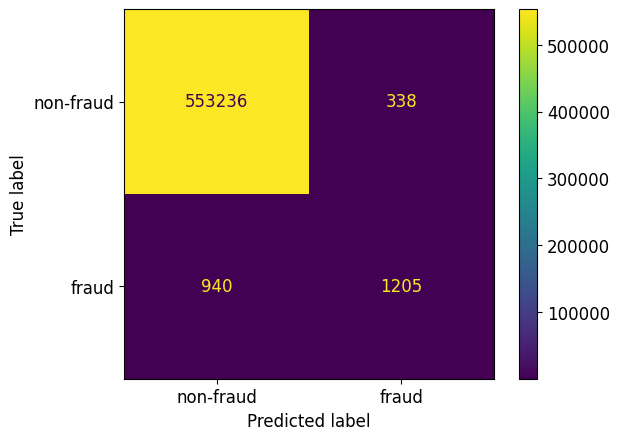

In [111]:
metrics_all(y_testData,BalancedBagging_Testprediction)

## Testing XGBoostModel

In [112]:
XGBoostModel_Testprediction = XGB_model.predict(X_testData)

0.9959439932771779
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.48      0.63      0.54      2145

    accuracy                           1.00    555719
   macro avg       0.74      0.81      0.77    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

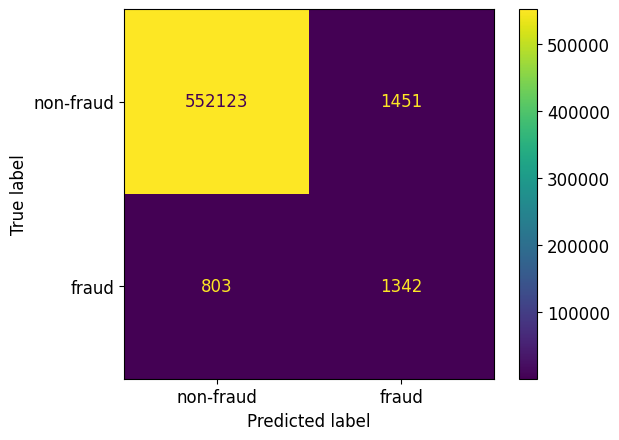

In [113]:
metrics_all(y_testData,XGBoostModel_Testprediction)

## **Random Over Sampling**

## Logistic Reg

In [114]:
LogisticRegression_Testrosprediction = LogisticRegressio_rosmodel.predict(X_testData)

0.8970702819230583
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    553574
           1       0.03      0.78      0.05      2145

    accuracy                           0.90    555719
   macro avg       0.51      0.84      0.50    555719
weighted avg       1.00      0.90      0.94    555719



<Figure size 1500x1000 with 0 Axes>

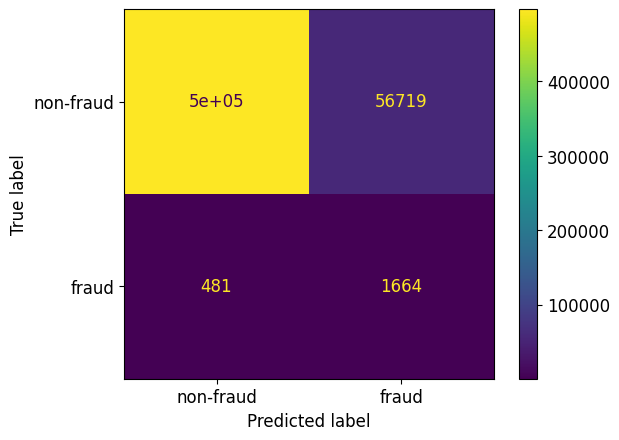

In [115]:
metrics_all(y_testData,LogisticRegression_Testrosprediction)

## RF

In [116]:
RandomForest_Testrosprediction = RandomForest_rosmodel.predict(X_testData)

0.9976085035782473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.69      0.69      0.69      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.85      0.85    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

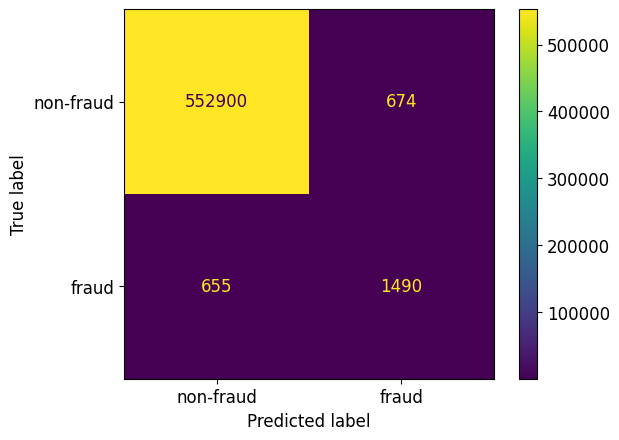

In [117]:
metrics_all(y_testData,RandomForest_Testrosprediction)

## DecisionTree

In [118]:
DecisionTree_Testrosprediction = DecisionTree_rosmodel.predict(X_testData)

0.9966961719862016
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.57      0.59      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.78      0.79      0.79    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

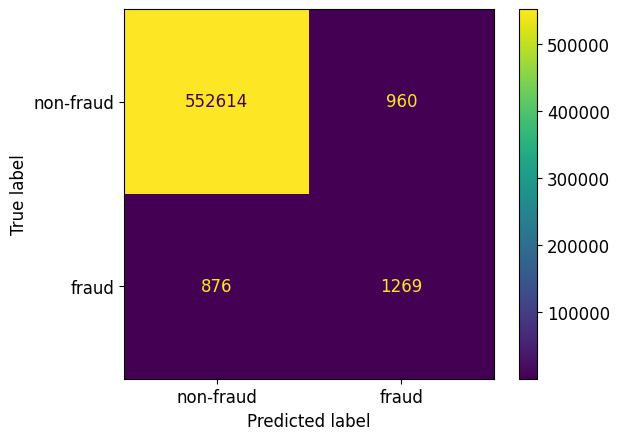

In [119]:
metrics_all(y_testData,DecisionTree_Testrosprediction)

## ROS BALANCEDBAGGING

In [120]:
BalancedBagging_Testrosprediction = BalancedBagging_rosmodel.predict(X_testData)

0.9974429522834383
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.68      0.63      0.66      2145

    accuracy                           1.00    555719
   macro avg       0.84      0.82      0.83    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

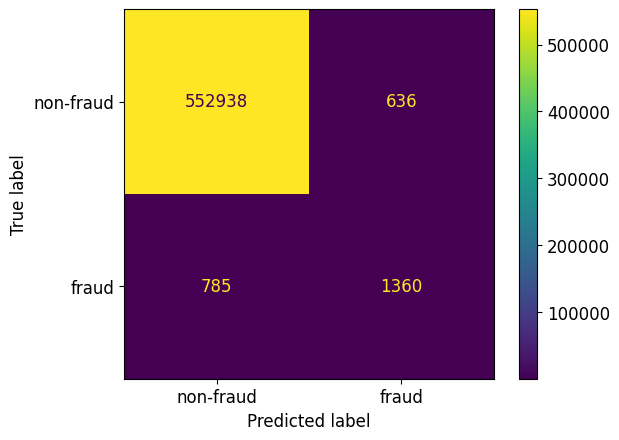

In [121]:
metrics_all(y_testData,BalancedBagging_Testrosprediction)

## ROS XGBClassifier

In [122]:
XGB_Testrosprediction = XGB_rosmodel.predict(X_testData)

0.9858831531763356
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.19      0.85      0.32      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.92      0.65    555719
weighted avg       1.00      0.99      0.99    555719



<Figure size 1500x1000 with 0 Axes>

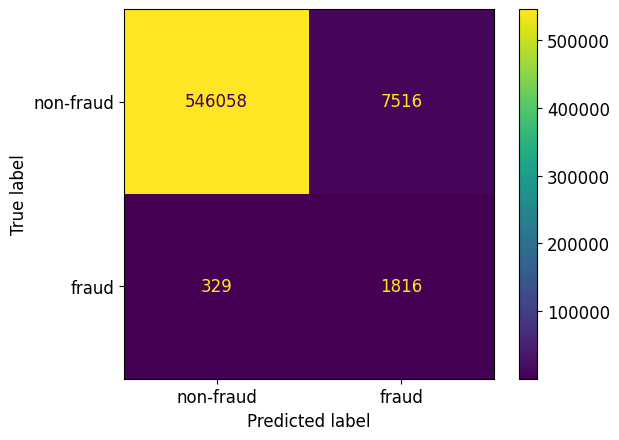

In [123]:
metrics_all(y_testData,XGB_Testrosprediction)

## **SMOTE**

In [124]:
SMOTE_TestSMOTEprediction = smoterf_model.predict(X_testData)

0.9955787007462404
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.72      0.56      2145

    accuracy                           1.00    555719
   macro avg       0.73      0.86      0.78    555719
weighted avg       1.00      1.00      1.00    555719



<Figure size 1500x1000 with 0 Axes>

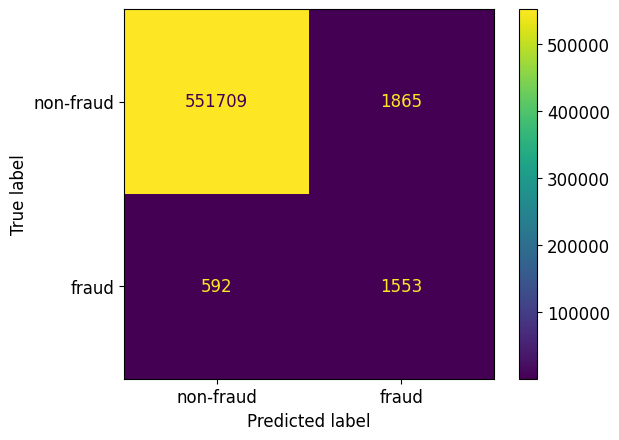

In [125]:
metrics_all(y_testData,SMOTE_TestSMOTEprediction)

# Deployment

In [126]:
import joblib
file='fraudGui'
joblib.dump(RandomForest_model, "fraudGui")
model=joblib.load(open("fraudGui", 'rb'))